In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_pickle(r'pickles/df4.pkl')

def regressionMetrics(y, yhat):
    res = {'MSE': metrics.mean_squared_error(y,yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           'MAE': metrics.mean_absolute_error(y,yhat),
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res



In [9]:
df.columns

Index(['Region_encoded', 'Active/100 Cases', 'Recovered/100 Cases',
       'New Deaths', 'New Active', 'New Recovered', 'r', 'new_tests',
       'Income_Support', 'Debt_Relief', 'Public_Info_Campaigns',
       'Testing_Policy', 'Contact_Tracing', 'Pop_Group_encoded', 'Pop.Density',
       'Density_Group_encoded', '% aging.pop', '% young.pop', '% healthcare',
       'GDP_per_capita', '% smoking', 'total_tests_per_100',
       'new_tests_per_100', 'Pandemic_Status_Code', 'log_GDP_billions',
       'Workplace_Closing_lag30', 'Internal_Movement_Restrictions_lag30',
       'Stay_at_Home_lag30', 'School_Closing_lag30',
       'Gathering_Restrictions_lag30', 'Public_Events_Canceled_lag30',
       'Public_Transport_Closed_lag30', 'Mask_Mandate_lag30',
       'International_Travel_Controls_lag30', 'Grocery and pharmacy_lag14',
       'Retail and recreation_lag14', 'Transit stations_lag14',
       'Grocery and pharmacy_lag30', 'Parks_lag30', 'Residential_lag30',
       'Retail and recreation_lag

XGBoost Performance:
  MSE:  818.4197
  RMSE: 28.6080
  MAE:  6.8803
  R²:   0.9123


<Figure size 1000x600 with 0 Axes>

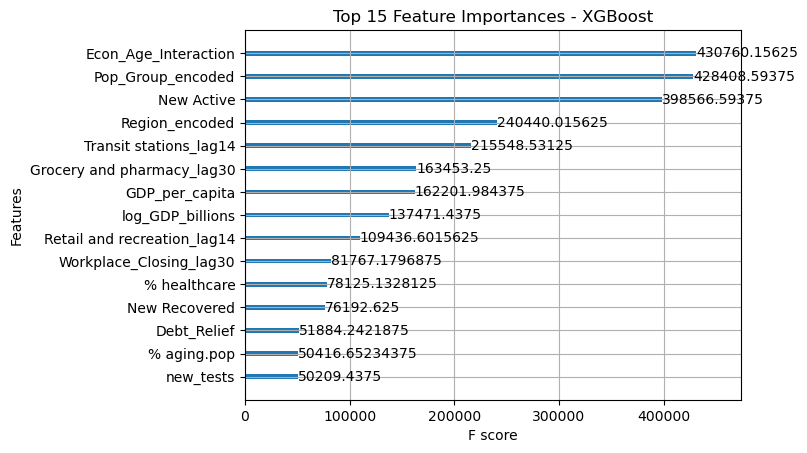

In [10]:
y = df['New Deaths']
X = df.drop(columns=['New Deaths'])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42,shuffle=True)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42,shuffle=True)


# --- Train XGBoost model ---
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,
    learning_rate=0.01,
    min_child_weight=3,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.6,
    reg_lambda=10,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# --- Evaluate on dev set ---
y_pred = xgb_model.predict(X_dev)
y_pred = np.maximum(0, y_pred)  # clip negatives if needed

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)

print(f"XGBoost Performance:")
print(f"  MSE:  {mse:.4f}")
print(f"  RMSE: {np.sqrt(mse):.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  R²:   {r2:.4f}")

# --- Feature importance ---
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=15, importance_type='gain')
plt.title("Top 15 Feature Importances - XGBoost")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import xgboost as xgb

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# Train model
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.1,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='rmse'
)
model.fit(X_train, y_train,    eval_set=[(X_test, y_test)],
    early_stopping_rounds=50,
    verbose=False)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


C:\Users\Win10\anaconda3\Lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [6]:
def evaluate(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} Performance:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print("-" * 30)

evaluate(y_train, y_train_pred, "Train")
evaluate(y_test, y_test_pred, "Test")

Train Performance:
  MSE:  1133.4016
  RMSE: 33.6660
  MAE:  8.3451
  R²:   0.8710
------------------------------
Test Performance:
  MSE:  1105.1472
  RMSE: 33.2438
  MAE:  9.5740
  R²:   0.8700
------------------------------
